In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# read in data
dete=pd.read_csv('dete_survey.csv')
tafe=pd.read_csv('tafe_survey.csv')

In [3]:
pd.set_option('display.max_columns', None)
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
pd.reset_option('display.max_columns')
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
# Examining duplicate entries
dete.duplicated().sum()

0

In [9]:
dete.ID.duplicated().sum()

0

In [10]:
# Examining duplicate entries
tafe.duplicated().sum()

0

In [11]:
tafe['Record ID'].duplicated().sum()

0

**eliminating unnecesarry columns**

from analysis of columns these column have been remove for one of the following reasons:

- not relevant to analysis
- repeated information

In [12]:
columns_to_drop = list(range(5, 13)) + list(range(20, 24)) + list(range(27, 50))+list(range(51, 56))

In [13]:
dete= dete.drop(dete.columns[columns_to_drop], axis=1)

In [14]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Job dissatisfaction                  822 non-null    bool  
 6   Dissatisfaction with the department  822 non-null    bool  
 7   Physical work environment            822 non-null    bool  
 8   Lack of recognition                  822 non-null    bool  
 9   Lack of job security                 822 non-null    bool  
 10  Work location                        822 non-null    bool  
 11  Employment conditions                822 non-

In [15]:
columns_to_drop = list(range(1, 3)) + list(range(5, 10)) + list(range(12, 67)) + list(range(68, 70))+[71]

In [16]:
tafe= tafe.drop(tafe.columns[columns_to_drop], axis=1)

In [17]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 7 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   CESSATION YEAR                                                             695 non-null    float64
 2   Reason for ceasing employment                                              701 non-null    object 
 3   Contributing Factors. Dissatisfaction                                      437 non-null    object 
 4   Contributing Factors. Job Dissatisfaction                                  437 non-null    object 
 5   CurrentAge. Current Age                                                    596 non-null    object 
 6   LengthofServiceOverall. Overall Length of Service at Instit

**Clean dataframe column headers**

This section of the data cleaning project seeks to clean and standardize the column of both dataframe.

columns from both dataframes containing the same data wouldbe given the same header.

In [18]:
# clean dete headers

dete.columns=dete.columns.str.lower().str.strip().str.replace(' ','_').str.replace('separationtype','separation_type')

In [19]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   822 non-null    int64 
 1   separation_type                      822 non-null    object
 2   cease_date                           822 non-null    object
 3   dete_start_date                      822 non-null    object
 4   role_start_date                      822 non-null    object
 5   job_dissatisfaction                  822 non-null    bool  
 6   dissatisfaction_with_the_department  822 non-null    bool  
 7   physical_work_environment            822 non-null    bool  
 8   lack_of_recognition                  822 non-null    bool  
 9   lack_of_job_security                 822 non-null    bool  
 10  work_location                        822 non-null    bool  
 11  employment_conditions                822 non-

In [20]:
# clean tafe headers

column_mapping = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separation_type',
    'CurrentAge. Current Age': 'age',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    
}

tafe.rename(column_mapping,axis=1, inplace=True)

In [21]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         702 non-null    float64
 1   cease_date                                 695 non-null    float64
 2   separation_type                            701 non-null    object 
 3   Contributing Factors. Dissatisfaction      437 non-null    object 
 4   Contributing Factors. Job Dissatisfaction  437 non-null    object 
 5   age                                        596 non-null    object 
 6   institute_service                          596 non-null    object 
dtypes: float64(2), object(5)
memory usage: 38.5+ KB


In [22]:
# checking columns that are relevant to the question

dete['separation_type'].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [23]:
# filtering data to focus on resignations
dete=dete.loc[dete['separation_type'].str.contains('Resignation'),:].reset_index(drop=True)

In [24]:
dete.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,age
0,4,Resignation-Other reasons,05/2012,2005,2006,False,False,False,False,False,False,False,False,False,False,36-40
1,6,Resignation-Other reasons,05/2012,1994,1997,False,False,False,False,False,False,True,False,False,False,41-45
2,9,Resignation-Other reasons,07/2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35
3,10,Resignation-Other employer,2012,1997,2008,True,True,False,False,False,False,False,False,False,False,46-50
4,12,Resignation-Move overseas/interstate,2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35


In [25]:
tafe['separation_type'].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

In [26]:
tafe=tafe.loc[tafe['separation_type'] == 'Resignation',:].reset_index(drop=True)

In [27]:
tafe.head()

,id,cease_date,separation_type,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,age,institute_service
0,634139903350000000.000,2010.000,Resignation,-,-,NaN,NaN
1,634146578511788032.000,2010.000,Resignation,-,-,41 45,3-4
2,634147506906311040.000,2010.000,Resignation,-,-,56 or older,7-10
3,634152007975693952.000,2010.000,Resignation,-,-,20 or younger,3-4
4,634153745310374016.000,2010.000,Resignation,-,-,46 50,3-4


**Further data cleaning for both tables**

In [28]:
# dete data frames

In [29]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   311 non-null    int64 
 1   separation_type                      311 non-null    object
 2   cease_date                           311 non-null    object
 3   dete_start_date                      311 non-null    object
 4   role_start_date                      311 non-null    object
 5   job_dissatisfaction                  311 non-null    bool  
 6   dissatisfaction_with_the_department  311 non-null    bool  
 7   physical_work_environment            311 non-null    bool  
 8   lack_of_recognition                  311 non-null    bool  
 9   lack_of_job_security                 311 non-null    bool  
 10  work_location                        311 non-null    bool  
 11  employment_conditions                311 non-

In [30]:
dete.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,age
0,4,Resignation-Other reasons,05/2012,2005,2006,False,False,False,False,False,False,False,False,False,False,36-40
1,6,Resignation-Other reasons,05/2012,1994,1997,False,False,False,False,False,False,True,False,False,False,41-45
2,9,Resignation-Other reasons,07/2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35
3,10,Resignation-Other employer,2012,1997,2008,True,True,False,False,False,False,False,False,False,False,46-50
4,12,Resignation-Move overseas/interstate,2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35


In [31]:
#checking the pattern of the cease_date column for data cleaning oppurtunities
dete['cease_date'][~(dete['cease_date'].str.contains('/'))].unique()

array(['2012', '2013', '2010', 'Not Stated'], dtype=object)

In [32]:
# examining all the remaining date columns for non numeric entries due to object data type
## also checking for similar entry format as cease_date
date_columns = ['dete_start_date', 'role_start_date']

def find_non_numeric_entries(df, column):
    non_numeric_entries = df[column][pd.to_numeric(df[column], errors='coerce').isnull()]
    print(non_numeric_entries.unique())


for column in date_columns:
    print(f"\nNon-numeric patterns in '{column}' column:")
    find_non_numeric_entries(dete, column)



Non-numeric patterns in 'dete_start_date' column:
['Not Stated']

Non-numeric patterns in 'role_start_date' column:
['Not Stated']


In [33]:
# replace not stated with null for easy data handling in date columns
dete[['cease_date','dete_start_date', 'role_start_date']]=dete[['cease_date','dete_start_date', 'role_start_date']].replace('Not Stated',np.nan)

In [34]:
# selecting only year portion of cease_date entries in cease_date column

dete['cease_date']=dete['cease_date'].str[-4:]

In [35]:
# convert date columns to integers
dete[['cease_date','dete_start_date', 'role_start_date']]= dete[['cease_date','dete_start_date', 'role_start_date']].astype('Int64')


In [36]:
# check for data anomalies
dete[['cease_date','dete_start_date', 'role_start_date']].describe()

,cease_date,dete_start_date,role_start_date
count,300.000,283.000,271.000
mean,2012.600,2002.067,1999.653
std,0.754,9.914,109.966
min,2006.000,1963.000,200.000
25%,2012.000,1997.000,2004.000
50%,2013.000,2005.000,2009.000
75%,2013.000,2010.000,2011.000
max,2014.000,2013.000,2013.000


In [37]:
# anomally observed 
dete[dete['role_start_date'] < 1963]

,id,separation_type,cease_date,dete_start_date,role_start_date,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,age
137,391,Resignation-Other employer,2013,2000,200,False,False,False,False,False,False,False,False,False,False,46-50


In [38]:
# checking for anomalies in dates
dete[((dete['cease_date'] < dete['dete_start_date']) | (dete['dete_start_date'] > dete['role_start_date'])|(dete['cease_date'] < dete['role_start_date']))]


,id,separation_type,cease_date,dete_start_date,role_start_date,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,age
137,391,Resignation-Other employer,2013,2000,200,False,False,False,False,False,False,False,False,False,False,46-50
166,460,Resignation-Move overseas/interstate,2012,2011,2013,False,False,False,False,False,False,False,False,False,False,36-40


In [39]:
# anomalies found

In [40]:
#eliminating annomalies
dete = dete[(dete.id != 391) & (dete.id != 460)]

In [41]:
# examining categorical columns
cat_cols=dete.iloc[:,5:].drop('age',axis=1)
unique_elements_per_column = cat_cols.apply(lambda col: col.unique())
unique_elements_per_column

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload
0,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True


In [42]:
cat_cols.apply(lambda x:x.value_counts(dropna=False))

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload
False,268,280,303,276,295,291,286,298,241,282
True,41,29,6,33,14,18,23,11,68,27


In [43]:
#examining age column

In [44]:
dete.age.unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

In [45]:
#tafe dataframe

In [46]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         340 non-null    float64
 1   cease_date                                 335 non-null    float64
 2   separation_type                            340 non-null    object 
 3   Contributing Factors. Dissatisfaction      332 non-null    object 
 4   Contributing Factors. Job Dissatisfaction  332 non-null    object 
 5   age                                        290 non-null    object 
 6   institute_service                          290 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.7+ KB


In [47]:
tafe.head()

,id,cease_date,separation_type,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,age,institute_service
0,634139903350000000.000,2010.000,Resignation,-,-,NaN,NaN
1,634146578511788032.000,2010.000,Resignation,-,-,41 45,3-4
2,634147506906311040.000,2010.000,Resignation,-,-,56 or older,7-10
3,634152007975693952.000,2010.000,Resignation,-,-,20 or younger,3-4
4,634153745310374016.000,2010.000,Resignation,-,-,46 50,3-4


In [48]:
tafe.nunique()

id                                           340
cease_date                                     5
separation_type                                1
Contributing Factors. Dissatisfaction          2
Contributing Factors. Job Dissatisfaction      2
age                                            9
institute_service                              7
dtype: int64

In [49]:
#data quality check
tafe.cease_date.unique()

array([2010., 2009.,   nan, 2011., 2012., 2013.])

In [50]:
#examining other columns
categorical_columns=tafe.iloc[:,3:]
categorical_columns.apply(lambda col: col.unique())

Contributing Factors. Dissatisfaction         [-, Contributing Factors. Dissatisfaction , nan]
Contributing Factors. Job Dissatisfaction                        [-, Job Dissatisfaction, nan]
age                                          [nan, 41  45, 56 or older, 20 or younger, 46  ...
institute_service                            [nan, 3-4, 7-10, 1-2, Less than 1 year, 11-20,...
dtype: object

# dissatisfied employees

dissatisfied employee were identified from both survey dataframes using relevant columns

In [51]:
dete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   309 non-null    int64 
 1   separation_type                      309 non-null    object
 2   cease_date                           298 non-null    Int64 
 3   dete_start_date                      281 non-null    Int64 
 4   role_start_date                      269 non-null    Int64 
 5   job_dissatisfaction                  309 non-null    bool  
 6   dissatisfaction_with_the_department  309 non-null    bool  
 7   physical_work_environment            309 non-null    bool  
 8   lack_of_recognition                  309 non-null    bool  
 9   lack_of_job_security                 309 non-null    bool  
 10  work_location                        309 non-null    bool  
 11  employment_conditions                309 non-

In [52]:
tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         340 non-null    float64
 1   cease_date                                 335 non-null    float64
 2   separation_type                            340 non-null    object 
 3   Contributing Factors. Dissatisfaction      332 non-null    object 
 4   Contributing Factors. Job Dissatisfaction  332 non-null    object 
 5   age                                        290 non-null    object 
 6   institute_service                          290 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.7+ KB


### dissatisfied employees
Dete:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- traumatic_incident 
- work_life_balance
- workload

tafe:

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

### Examining dete dataframe

In [53]:
dissatisfied_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 
                   'physical_work_environment', 'lack_of_recognition', 
                   'lack_of_job_security', 'work_location', 'employment_conditions',
                   'traumatic_incident', 'work_life_balance', 'workload']
dete[dissatisfied_columns].apply(lambda col: col.unique())

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload
0,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True


In [54]:
# create dissatisfied column in dete
dissatisfied= dete[dissatisfied_columns].copy()
dete['dissatisfied']= dete[dissatisfied_columns].any(axis=1,skipna=False)
dete['dissatisfied']

0      False
1       True
2      False
3       True
4      False
       ...  
306    False
307    False
308    False
309     True
310    False
Name: dissatisfied, Length: 309, dtype: bool

In [55]:
dete.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,traumatic_incident,work_life_balance,workload,age,dissatisfied
0,4,Resignation-Other reasons,2012,2005,2006,False,False,False,False,False,False,False,False,False,False,36-40,False
1,6,Resignation-Other reasons,2012,1994,1997,False,False,False,False,False,False,True,False,False,False,41-45,True
2,9,Resignation-Other reasons,2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35,False
3,10,Resignation-Other employer,2012,1997,2008,True,True,False,False,False,False,False,False,False,False,46-50,True
4,12,Resignation-Move overseas/interstate,2012,2009,2009,False,False,False,False,False,False,False,False,False,False,31-35,False


### Examining tafe dataframe

In [56]:
dissatisfied_columns = ['Contributing Factors. Dissatisfaction',
                       'Contributing Factors. Job Dissatisfaction']
tafe[dissatisfied_columns].apply(lambda col: col.unique())

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
0,-,-
1,Contributing Factors. Dissatisfaction,Job Dissatisfaction
2,NaN,NaN


In [57]:
tafe['Contributing Factors. Dissatisfaction'].isnull().sum()

8

In [58]:
tafe[dissatisfied_columns][tafe['Contributing Factors. Job Dissatisfaction'].isnull()]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
11,NaN,NaN
13,NaN,NaN
34,NaN,NaN
155,NaN,NaN
161,NaN,NaN
212,NaN,NaN
232,NaN,NaN
316,NaN,NaN


In [59]:
#creating dissatisfaction column
condition_1 = tafe['Contributing Factors. Dissatisfaction'].str.contains('Contributing Factors. Dissatisfaction', na=False)
condition_2 = tafe['Contributing Factors. Job Dissatisfaction'].str.contains('Job Dissatisfaction', na=False)
condition_3 = tafe['Contributing Factors. Dissatisfaction'] == '-'
condition_4 = tafe['Contributing Factors. Job Dissatisfaction'] == '-'


tafe['dissatisfied'] = np.where(
    (condition_1 | condition_2),
    True,
    np.where(
        (condition_3 & condition_4), 
        False,
        np.nan  
    )
)

In [60]:
dissatisfied_columns = ['Contributing Factors. Dissatisfaction',
                       'Contributing Factors. Job Dissatisfaction','dissatisfied']
tafe[dissatisfied_columns]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
0,-,-,0.000
1,-,-,0.000
2,-,-,0.000
3,-,-,0.000
4,-,-,0.000
...,...,...,...
335,-,-,0.000
336,-,-,0.000
337,-,-,0.000
338,-,-,0.000


In [61]:
tafe[dissatisfied_columns][tafe['dissatisfied'].isnull()]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
11,NaN,NaN,NaN
13,NaN,NaN,NaN
34,NaN,NaN,NaN
155,NaN,NaN,NaN
161,NaN,NaN,NaN
212,NaN,NaN,NaN
232,NaN,NaN,NaN
316,NaN,NaN,NaN


In [62]:
tafe.head()

,id,cease_date,separation_type,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,age,institute_service,dissatisfied
0,634139903350000000.000,2010.000,Resignation,-,-,NaN,NaN,0.000
1,634146578511788032.000,2010.000,Resignation,-,-,41 45,3-4,0.000
2,634147506906311040.000,2010.000,Resignation,-,-,56 or older,7-10,0.000
3,634152007975693952.000,2010.000,Resignation,-,-,20 or younger,3-4,0.000
4,634153745310374016.000,2010.000,Resignation,-,-,46 50,3-4,0.000


## Identify length of service 

## Dete dataframe

In [63]:
# identify relevant columns

dete[['cease_date','dete_start_date']].isnull().sum()

cease_date         11
dete_start_date    28
dtype: int64

In [64]:
dete['institute_service']=dete['cease_date'].subtract(dete['dete_start_date'], fill_value=None)
dete['institute_service']

0         7
1        18
2         3
3        15
4         3
       ... 
306       3
307       2
308       2
309       5
310    <NA>
Name: institute_service, Length: 309, dtype: Int64

In [65]:
# create bins for institute service
bins = [0, 3, 7, 11, np.inf]
labels = ['New', 'Experienced', 'Established', 'Veteran']
dete['institute_service'] = pd.cut(dete['institute_service'], bins=bins, labels=labels, right=False)
dete['institute_service']

0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
          ...     
306    Experienced
307            New
308            New
309    Experienced
310            NaN
Name: institute_service, Length: 309, dtype: category
Categories (4, object): ['New' < 'Experienced' < 'Established' < 'Veteran']

## tafe dataframe

In [66]:
tafe['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [67]:
#Create institute service bins in tafe
category_map = {
  'Less than 1 year': 'New',
  '1-2': 'New',
  '3-4': 'Experienced',
  '5-6': 'Experienced',
  '7-10': 'Established',
  '11-20': 'Veteran',
  'More than 20 years': 'Veteran'
}

tafe['institute_service'] = tafe['institute_service'].map(category_map, na_action='ignore')



In [68]:
tafe['institute_service'].value_counts()

New            137
Experienced     96
Veteran         36
Established     21
Name: institute_service, dtype: int64

In [69]:
# create identifiers for each institute's dataframe for easy identification after combining
dete['institute']='dete'
tafe['institute']='tafe'

## Combine the dataframes

In [70]:
combined= pd.concat([dete[['id','separation_type','dissatisfied','institute_service','age','institute']],tafe[['id','separation_type','dissatisfied','institute_service','age','institute']]])
combined.head()

C:\Users\adenu\AppData\Local\Temp\ipykernel_9368\1025661117.py:1: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  combined= pd.concat([dete[['id','separation_type','dissatisfied','institute_service','age','institute']],tafe[['id','separation_type','dissatisfied','institute_service','age','institute']]])


,id,separation_type,dissatisfied,institute_service,age,institute
0,4.000,Resignation-Other reasons,0.000,Established,36-40,dete
1,6.000,Resignation-Other reasons,1.000,Veteran,41-45,dete
2,9.000,Resignation-Other reasons,0.000,Experienced,31-35,dete
3,10.000,Resignation-Other employer,1.000,Veteran,46-50,dete
4,12.000,Resignation-Move overseas/interstate,0.000,Experienced,31-35,dete


In [71]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 339
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 649 non-null    float64
 1   separation_type    649 non-null    object 
 2   dissatisfied       641 non-null    float64
 3   institute_service  561 non-null    object 
 4   age                594 non-null    object 
 5   institute          649 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.5+ KB


In [72]:
combined.age.unique()

array(['36-40', '41-45', '31-35', '46-50', '61 or older', '56-60',
       '51-55', '21-25', '26-30', nan, '20 or younger', '41  45',
       '56 or older', '46  50', '36  40', '21  25', '31  35', '26  30'],
      dtype=object)

In [73]:
# transform age column to new format
def transform_age_range(age_range):
    if pd.isna(age_range):
        return pd.NA
    elif age_range == '20 or younger' or age_range in ['21-25', '26-30']:
        return 'Young'
    elif age_range in ['31-35', '36-40']:
        return 'Middle-age'
    elif age_range in ['41-45', '46-50']:
        return 'Senior'
    else:
        return 'Elder'

    
combined['age'] = combined['age'].apply(transform_age_range)

In [74]:
combined.age.unique()

array(['Middle-age', 'Senior', 'Elder', 'Young', <NA>], dtype=object)

In [75]:
# examine dissatisfied column in combined dataframe
combined.dissatisfied.unique()

array([ 0.,  1., nan])

In [76]:
# remove null values from this column
combined.dropna(subset=['dissatisfied'], inplace=True)


In [77]:
combined.dissatisfied.unique()

array([0., 1.])

In [78]:
# convert to boolean data type
combined.dissatisfied=combined.dissatisfied.astype(bool)
combined.dissatisfied

0      False
1       True
2      False
3       True
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Name: dissatisfied, Length: 641, dtype: bool

In [79]:
combined.head()

,id,separation_type,dissatisfied,institute_service,age,institute
0,4.000,Resignation-Other reasons,False,Established,Middle-age,dete
1,6.000,Resignation-Other reasons,True,Veteran,Senior,dete
2,9.000,Resignation-Other reasons,False,Experienced,Middle-age,dete
3,10.000,Resignation-Other employer,True,Veteran,Senior,dete
4,12.000,Resignation-Move overseas/interstate,False,Experienced,Middle-age,dete


# Analysis





## Question 1

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


In [80]:
combined.groupby('institute_service')['dissatisfied'].value_counts().unstack()

dissatisfied,False,True
institute_service,,
Established,30,32
Experienced,113,59
New,135,57
Veteran,66,69


In [81]:
x=combined.groupby('institute_service')['dissatisfied'].value_counts().unstack()

dissatisfied_service= x.apply(lambda z: (z/z.sum())*100, axis=1)[True]
dissatisfied_service

institute_service
Established   51.613
Experienced   34.302
New           29.688
Veteran       51.111
Name: True, dtype: float64

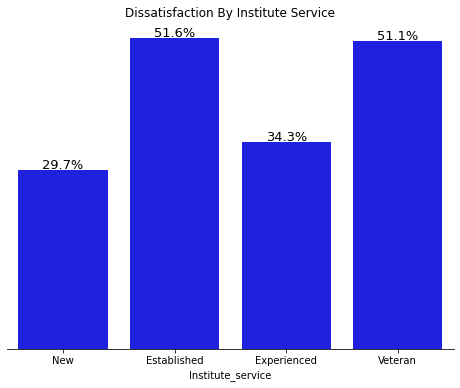

In [82]:
order = [ 'New','Established', 'Experienced', 'Veteran']
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=dissatisfied_service.index, y=dissatisfied_service.values, order=order, color='blue')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xlabel('Institute_service')
plt.title('Dissatisfaction By Institute Service')

sns.despine(left=True)
ax.tick_params(left=False)
ax.set(yticklabels=[])


plt.show()

#### Insights

1. New employees are not more likely to resign due to dissatisfaction.
2. Resignations among established and veteran employees are due more to dissatifaction than other employee segments.

## Question 2

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [83]:
combined.groupby('age')['dissatisfied'].value_counts().unstack()

dissatisfied,False,True
age,,
Elder,240,122
Middle-age,37,32
Senior,45,44
Young,43,31


In [84]:
x=combined.groupby('age')['dissatisfied'].value_counts().unstack()

dissatisfied_age= x.apply(lambda z: (z/z.sum())*100, axis=1)[True]
dissatisfied_age

age
Elder        33.702
Middle-age   46.377
Senior       49.438
Young        41.892
Name: True, dtype: float64

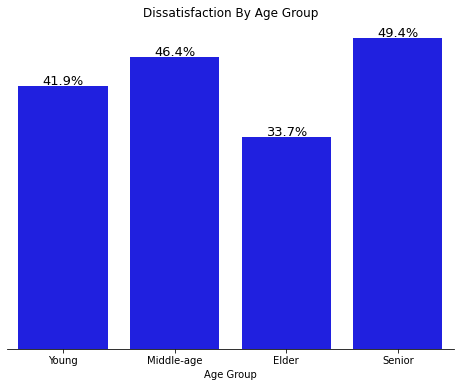

In [85]:
order = ['Young', 'Middle-age', 'Elder', 'Senior']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=dissatisfied_age.index, y=dissatisfied_age.values, order=order, color='blue')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xlabel('Age Group')
plt.title('Dissatisfaction By Age Group')

sns.despine(left=True)
ax.tick_params(left=False)
ax.set(yticklabels=[])


plt.show()

#### Insights

1. About 42% of resignations among young employees can be attributed to dissatisfaction.
2. Middle-aged employees and seniors had the highest resignation due to dissatisfaction rates of 46% and 49% respectively.

## Further analysis

### Disatisfaction by Institute

In [86]:
combined.groupby('institute')['dissatisfied'].value_counts().unstack()

dissatisfied,False,True
institute,,
dete,157,152
tafe,241,91


In [87]:
x=combined.groupby('institute')['dissatisfied'].value_counts().unstack()

dissatisfied_institute= x.apply(lambda z: (z/z.sum())*100, axis=1)[True]
dissatisfied_institute

institute
dete   49.191
tafe   27.410
Name: True, dtype: float64

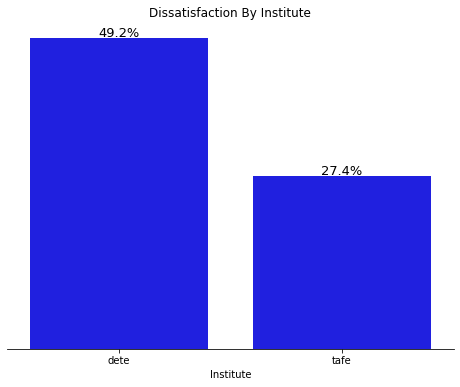

In [88]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=dissatisfied_institute.index, y=dissatisfied_institute.values, color='blue')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=13, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xlabel('Institute')
plt.title('Dissatisfaction By Institute')

sns.despine(left=True)
ax.tick_params(left=False)
ax.set(yticklabels=[])


plt.show()

#### Insights

1. Dete had a higher dissatisfaction rate of 49%